In [ ]:
# 2. Dada la siguiente tabla de frecuencia no común

import pandas as pd
import numpy as np

tabla_frecuncia = pd.DataFrame({
    'Intervalos': [(20, 40), (40, 50), (50, 80), (80, 90), (90, 94)],
     'Li': [20, 40, 50, 80, 90],
     'Ui': [40, 50, 80, 90, 94],
    'f_absoluta': [10, 25, 46, 9, 10]
})

tabla_frecuncia['m_clase'] = (tabla_frecuncia['Li'] + tabla_frecuncia['Ui'])/2
tabla_frecuncia['f_i_por_m_i'] = tabla_frecuncia['f_absoluta'] * tabla_frecuncia['m_clase']

# Determinar la media y la mediana de esta distribuci´on. (2 puntos)
# x = sum(f_i*m_i)/n
def calcular_media_agrupada(f_i_por_m_i, n):
  return sum(f_i_por_m_i)/n

n = sum(tabla_frecuncia['f_absoluta'])
media_agrupada = calcular_media_agrupada(
    tabla_frecuncia['f_i_por_m_i'],
    n
)

print('Remplazar con su comentario', media_agrupada)

# Me = Li + A/f_i (n/2 - F_i-1)

tabla_frecuncia['f_acumulada'] = tabla_frecuncia['f_absoluta'].cumsum()
print(tabla_frecuncia)

Li = tabla_frecuncia['Li'][2]
A = tabla_frecuncia['Ui'][2] - tabla_frecuncia['Li'][2]
f_i = tabla_frecuncia['f_absoluta'][2]
F_i_1 = tabla_frecuncia['f_acumulada'][1]
mediana = Li + (A/f_i)*(n/2 - F_i_1)

print('Remplazar con su interpretacion de mediana', mediana)


Remplazar con su comentario 61.0
  Intervalos  Li  Ui  f_absoluta  m_clase  f_i_por_m_i  f_acumulada
0   (20, 40)  20  40          10     30.0        300.0           10
1   (40, 50)  40  50          25     45.0       1125.0           35
2   (50, 80)  50  80          46     65.0       2990.0           81
3   (80, 90)  80  90           9     85.0        765.0           90
4   (90, 94)  90  94          10     92.0        920.0          100
Remplazar con su interpretacion de mediana 59.78260869565217
35


In [ ]:
# import scypy
# Hallar el procentaje de los datos contenidos en el intervalo. (3 punto)
# I = {x ∈ R/|x − X| < ¯X/3}.
# |x − X| < ¯X/3
# -¯X/3 < x - X < ¯X/3
# -¯X/3 + X < x < ¯X/3 + X
#Donde, ¯X es la media, X es la mediana, ambas para datos clasificados.

# -61/3 + 59.78 < x < 61/3 + 59.78
print(-61/3 + 59.78)
print(61/3 + 59.78 )
# 39.44666666666667 < x < 80.11333333333333
# 40 <= x  <= 80
print(tabla_frecuncia['f_absoluta'][1]+ tabla_frecuncia['f_absoluta'][2],'%')

39.44666666666667
80.11333333333333
71 %


In [ ]:
import numpy as np
import pandas as pd

# Assuming you have your data in 'tabla_frecuncia' DataFrame
media_agrupada = tabla_frecuncia['f_i_por_m_i'].sum() / tabla_frecuncia['f_absoluta'].sum()
mediana = 59.78  # Replace with your calculated median

# Calculate the interval bounds
lower_bound = -media_agrupada / 3 + mediana
upper_bound = media_agrupada / 3 + mediana

# Filter data within the interval
filtered_data = tabla_frecuncia[
    (tabla_frecuncia['Li'] >= lower_bound) & (tabla_frecuncia['Ui'] <= upper_bound)
]

# Calculate the percentage
percentage = (filtered_data['f_absoluta'].sum() / tabla_frecuncia['f_absoluta'].sum()) * 100

print(f"Percentage of data within the interval: {percentage:.2f}%")

Percentage of data within the interval: 71.00%


In [ ]:
# La siguiente tabla representa el n´umero de trabajadores encuestados en 60
# empresas en el mes de octubre en el departamento de Hu´anuco en 2024:

tabla_trabajadores = [
  282, 252, 254, 305, 295, 301, 293, 294, 295, 302,
  270, 270, 275, 292, 280, 297, 230, 262, 253, 263,
  251, 255, 266, 274, 268, 258, 282, 284, 268, 287,
  303, 287, 295, 269, 251, 266, 270, 276, 274, 250,
  265, 260, 297, 271, 270, 280, 265, 271, 275, 260,
  294, 263, 253, 254, 289, 262, 255, 261, 282, 261
]

# Elaborar la tabla de frecuencias usando la regla de Sturges.
n = len(tabla_trabajadores)
min_value = min(tabla_trabajadores)
max_value = max(tabla_trabajadores)
rango = max_value - min_value
num_clases = round(np.ceil(1 + 3.322 * np.log10(n)))
ancho = np.ceil(rango / num_clases)

intervalos = np.array([
    (
      min_value + i * ancho,
      min_value + (i + 1) * ancho
    )
    for i in range(num_clases)
])

f_absoluta = np.array([
    (
        (tabla_trabajadores >= lower) &
        (tabla_trabajadores <= upper if (i + 1) == num_clases else tabla_trabajadores < upper)
    ).sum()
    for i, (lower, upper) in enumerate(intervalos)
])

tabla_frecuncia_trabajadores = pd.DataFrame({
    'Intervalos': [f"{lower} - {upper}" for lower, upper in intervalos],
    'Li': intervalos[:, 0],
    'Ui': intervalos[:, 1],
    'm_clase': (intervalos[:, 1] + intervalos[:, 0]) / 2,
    'f_absoluta': f_absoluta,
    'f_acumulada': f_absoluta.cumsum(),
    'f_relativa': f_absoluta / n,
    'f_r_acumulada': f_absoluta.cumsum() / n,
    'f_porcentual': f_absoluta / n * 100,
    'f_acumulada_por_100': f_absoluta.cumsum() / n * 100
})
print(tabla_frecuncia_trabajadores)

      Intervalos     Li     Ui  m_clase  f_absoluta  f_acumulada  f_relativa  \
0  230.0 - 241.0  230.0  241.0    235.5           1            1    0.016667   
1  241.0 - 252.0  241.0  252.0    246.5           3            4    0.050000   
2  252.0 - 263.0  252.0  263.0    257.5          14           18    0.233333   
3  263.0 - 274.0  263.0  274.0    268.5          15           33    0.250000   
4  274.0 - 285.0  274.0  285.0    279.5          11           44    0.183333   
5  285.0 - 296.0  285.0  296.0    290.5          10           54    0.166667   
6  296.0 - 307.0  296.0  307.0    301.5           6           60    0.100000   

   f_r_acumulada  f_porcentual  f_acumulada_por_100  
0       0.016667      1.666667             1.666667  
1       0.066667      5.000000             6.666667  
2       0.300000     23.333333            30.000000  
3       0.550000     25.000000            55.000000  
4       0.733333     18.333333            73.333333  
5       0.900000     16.666667     

In [ ]:
# b) Interpretar: f5, h2. (2 puntos)
print(tabla_frecuncia_trabajadores['f_absoluta'][4])

print(tabla_frecuncia_trabajadores['f_relativa'][1])

11
0.05


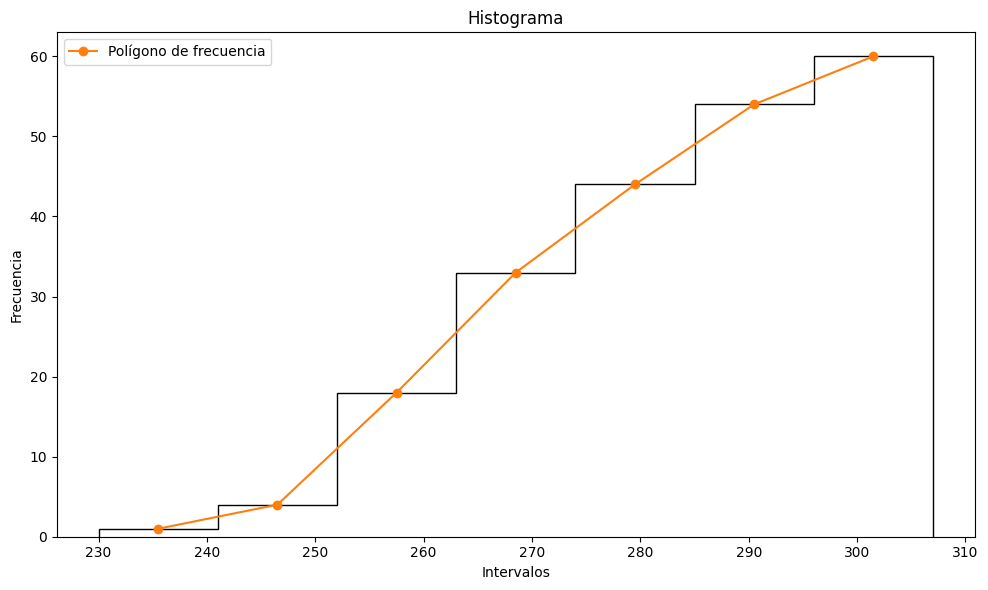

In [ ]:
import matplotlib.pyplot as plt

bins = np.arange(min_value, max_value + ancho, ancho)

def plot_histogram(relative=False, polygon=False):
    # Crear una nueva figura y ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Calcular los pesos si es relativo
    weights = np.ones_like(tabla_trabajadores) / n if relative else None

    # Crear el histograma
    hist = ax.hist(
        tabla_trabajadores,
        bins,
        weights=weights,
        edgecolor='black',
        cumulative=True,  # Acumular las frecuencias
        histtype='step'
    )

    frecuencias = tabla_frecuncia_trabajadores['f_acumulada']
    bins_center = tabla_frecuncia_trabajadores['m_clase']
    # Etiquetar cada barra con su frecuencia


    # Agregar polígono de frecuencia si se solicita
    if polygon:
        ax.plot(bins_center, frecuencias, 'o-', label='Polígono de frecuencia')
        ax.legend()

    # Configurar título y etiquetas de ejes
    ax.set_title('Histograma')
    ax.set_xlabel('Intervalos')
    ax.set_ylabel(f"Frecuencia")

    # Ajustar el diseño
    plt.tight_layout()

    plt.close(fig)
    # Retornar la figura
    return fig

plot_histogram(polygon=True)

In [ ]:
from scipy import stats

# d) Calcular la media aritm´etica (¯x) y la mediana (Me) para datos agrupados
# y no agrupados. (2 puntos)
# e) Calcular la moda (Mo) para datos agrupados y no agrupados. (2 puntos)

# x, Mo, ME no agrupada
media_no_agrupada = np.mean(tabla_trabajadores)
mediana_no_agrupada = np.median(tabla_trabajadores)
moda_no_agrupada = stats.mode(tabla_trabajadores)[0]

print('media_no_agrupada', media_no_agrupada)
print('mediana_no_agrupada', mediana_no_agrupada)
print('moda_no_agrupada',moda_no_agrupada)

# x, Mo, ME agrupada
media_agrupada = sum(tabla_frecuncia_trabajadores['m_clase'] * tabla_frecuncia_trabajadores['f_absoluta']) / n
print('media_agrupada', media_agrupada)

Li = tabla_frecuncia_trabajadores['Li'][3]
f_i = tabla_frecuncia_trabajadores['f_absoluta'][3]
F_i_1 = tabla_frecuncia_trabajadores['f_acumulada'][2]

mediana_agrupada = Li + ancho/f_i*(n/2 - F_i_1)
print('mediana_agrupada', mediana_agrupada)

f_i_menos_1 = tabla_frecuncia_trabajadores['f_absoluta'][2]
f_i_mas_1 = tabla_frecuncia_trabajadores['f_absoluta'][4]

moda_agrupada = Li + ancho *(f_i-f_i_menos_1)/(f_i-f_i_menos_1 + f_i-f_i_mas_1)
print('moda_agrupada',moda_agrupada)


media_no_agrupada 273.1166666666667
mediana_no_agrupada 270.0
moda_no_agrupada 270
media_no_agrupada 273.26666666666665
mediana_agrupada 271.8
moda_agrupada 265.2
